In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



*   Прочитайте csv файл (використовуйте функцію read_csv)




In [3]:
df = pd.read_csv('bestsellers with categories.csv')
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction




*   Виведіть перші п'ять рядків (використовується функція head)




In [5]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction




*   Виведіть розміри датасету (використовуйте атрибут shape)




In [7]:
df.shape

(550, 7)



*   Відповідь: Про скільки книг зберігає дані датасет?




In [8]:
df.shape[0]

550

In [9]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']




*   Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)




In [10]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64



*   Чи є в якихось змінних пропуски? (Так / ні)
*   Відповідь: Ні





*   Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)




In [11]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)



*    Які є унікальні жанри?
*   Відповідь: Non Fiction, Fiction





*   Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')




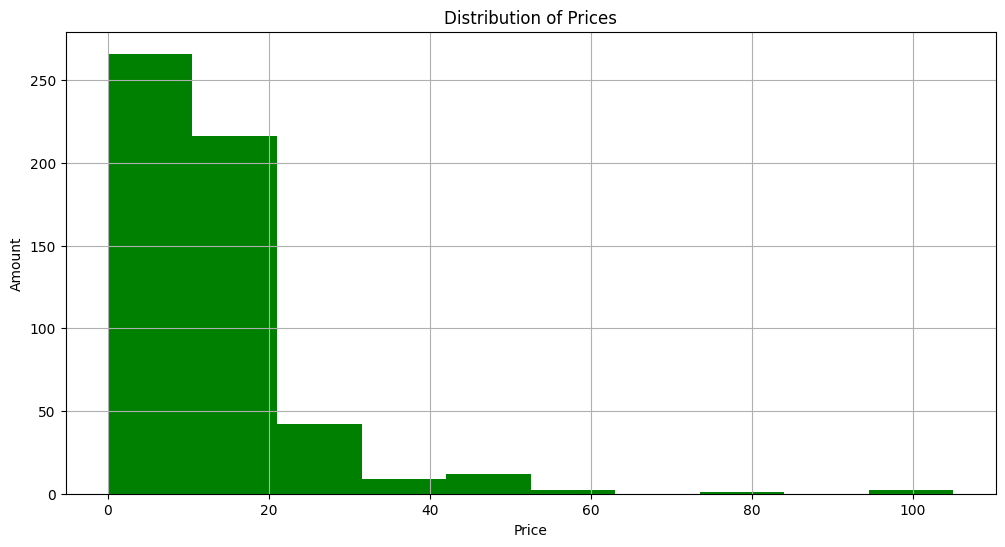

In [20]:
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=10, color='green')
plt.xlabel('Price')
plt.ylabel('Amount')
plt.title('Distribution of Prices')
plt.grid()
plt.show()



*   Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)




In [23]:
df['price'].max()


105

In [24]:
df['price'].min()


0

In [25]:
df['price'].mean()


13.1

In [26]:
df['price'].median()

11.0



*   Максимальна ціна?
Відповідь: 105





*   Мінімальна ціна?
Відповідь: 0





*   Середня ціна? Відповідь: 13.1
*   Медіанна ціна? Відповідь: 11.0





*   Який рейтинг у датасеті найвищий? Відповідь: 4.9




In [28]:
df['user_rating'].max()

4.9



*    Скільки книг мають такий рейтинг? Відповідь: 52




In [32]:
sum = len(df[df['user_rating'] == 4.9])
sum

52



*   Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing




In [33]:
df.loc[df['reviews'] == df['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction




*    З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychologic...




In [40]:
top = df[df['year'] == 2015].sort_values(by='user_rating', ascending=False).head(50)

top.loc[top['price'] == top['price'].max()]


,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction




*   Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20




In [43]:
fiction = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].sort_values(by='user_rating', ascending=False).head(50)
len(fiction)


20



*   Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1




In [44]:
book = len(df[df['year'].isin([2010, 2011]) & (df['user_rating'] == 4.9)])
book

1



*   І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
*   Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)



In [45]:
books_2015 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book = books_2015.iloc[-1]['name']
last_book


'Old School (Diary of a Wimpy Kid #10)'



*  Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам




In [47]:
gr_by_genre = df.groupby(by = 'genre')
gr_by_genre['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105




*   Максимальна ціна для жанру Fiction: Відповідь: 82
*   Мінімальна ціна для жанру Fiction: Відповідь: 0
*   Максимальна ціна для жанру Non Fiction: Відповідь: 105
*   Мінімальна ціна для жанру Non Fiction: Відповідь: 0






*   Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні




In [48]:
books = df.groupby('author')['name'].count().reset_index()
books.columns = ['author', 'amount']
books

,author,amount
0,Abraham Verghese,2
1,Adam Gasiewski,1
2,Adam Mansbach,1
3,Adir Levy,1
4,Admiral William H. McRaven,1
...,...,...
243,Walter Isaacson,3
244,William Davis,2
245,William P. Young,2
246,Wizards RPG Team,3




*   Якої розмірності вийшла таблиця? Відповідь: (248, 2)




In [49]:
books.shape

(248, 2)



*   Який автор має найбільше книг? Відповідь: Jeff Kinney




In [50]:
 books.loc[books['amount'] == books['amount'].max()]

,author,amount
120,Jeff Kinney,12




*    Скільки книг цього автора? Відповідь: 12





*   Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні




In [54]:
rating = df.groupby('author')['user_rating'].agg('mean').reset_index()
rating.columns = ['author', 'mean_rating']
rating


,author,mean_rating
0,Abraham Verghese,4.600000
1,Adam Gasiewski,4.400000
2,Adam Mansbach,4.800000
3,Adir Levy,4.800000
4,Admiral William H. McRaven,4.700000
...,...,...
243,Walter Isaacson,4.566667
244,William Davis,4.400000
245,William P. Young,4.600000
246,Wizards RPG Team,4.800000




*   У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt




In [57]:
rating.loc[rating['mean_rating'] == rating['mean_rating'].min()]

,author,mean_rating
71,Donna Tartt,3.9




*   Який у цього автора середній рейтинг? Відповідь: 3.9






*   З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну




In [58]:
new_table = pd.concat([books, rating['mean_rating'].round(2)], axis=1)
new_table

,author,amount,mean_rating
0,Abraham Verghese,2,4.60
1,Adam Gasiewski,1,4.40
2,Adam Mansbach,1,4.80
3,Adir Levy,1,4.80
4,Admiral William H. McRaven,1,4.70
...,...,...,...
243,Walter Isaacson,3,4.57
244,William Davis,2,4.40
245,William P. Young,2,4.60
246,Wizards RPG Team,3,4.80




*   Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)




In [59]:
new_table.sort_values(by=['amount', 'mean_rating'])

,author,amount,mean_rating
171,Muriel Barbery,1,4.00
43,Chris Cleave,1,4.10
109,Ian K. Smith M.D.,1,4.10
186,Pierre Dukan,1,4.10
81,Elizabeth Strout,1,4.20
...,...,...,...
11,American Psychological Association,10,4.50
226,Suzanne Collins,11,4.66
92,Gary Chapman,11,4.74
197,Rick Riordan,11,4.77




*   Який автор перший у списку? Відповідь: Muriel Barbery




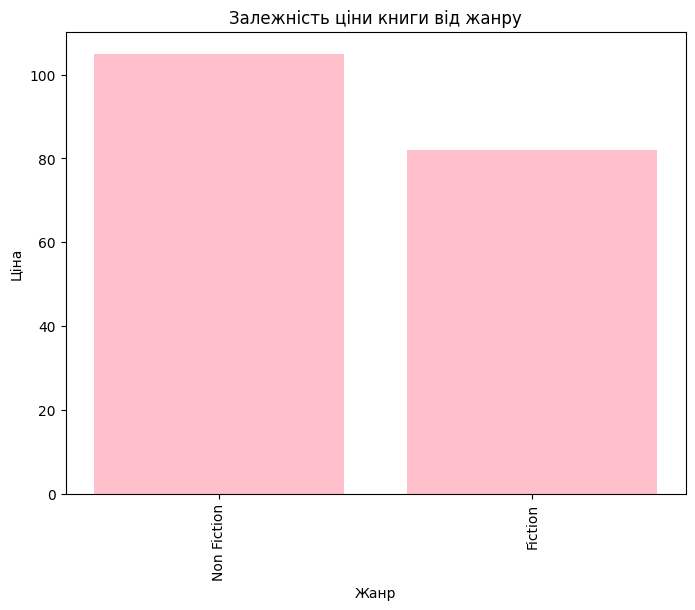

In [63]:
plt.figure(figsize=(8,6))
plt.bar(df['genre'], df['price'], color=['pink'])
plt.title('Залежність ціни книги від жанру')
plt.xlabel('Жанр')
plt.ylabel('Ціна')
plt.xticks(rotation=90)

plt.show()

In [72]:
for_figure =  new_table[new_table['mean_rating'] == 4.9]
for_figure


,author,amount,mean_rating
8,Alice Schertle,1,4.9
26,Bill Martin Jr.,2,4.9
41,Chip Gaines,1,4.9
58,Dav Pilkey,7,4.9
82,Emily Winfield Martin,4,4.9
83,Eric Carle,7,4.9
123,Jill Twiss,1,4.9
146,Lin-Manuel Miranda,1,4.9
173,Nathan W. Pyle,1,4.9
178,Patrick Thorpe,1,4.9


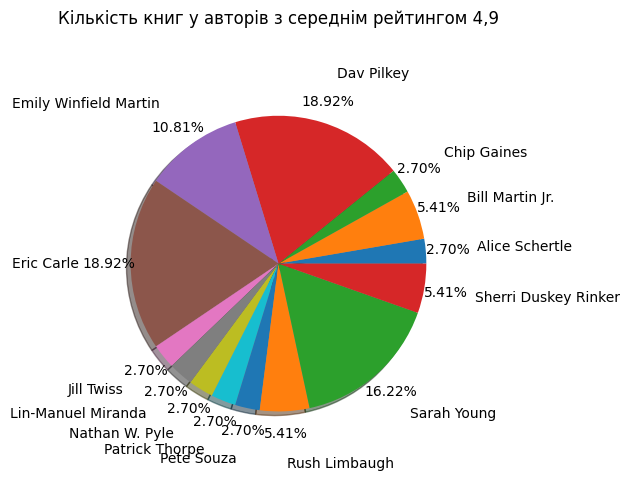

In [76]:
plt.pie(
    for_figure['amount'],
    labels=for_figure['author'] ,
    shadow=True,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)
plt.title('Кількість книг у авторів з середнім рейтингом 4,9', pad=40)
plt.show()

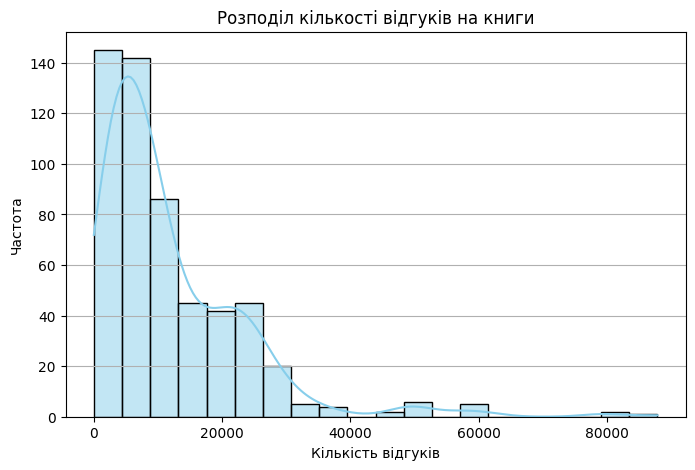

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(df['reviews'], bins=20, kde=True, color='skyblue')
plt.title('Розподіл кількості відгуків на книги')
plt.xlabel('Кількість відгуків')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()